
<u>Customer Churn Prediction Using Artificial Neural Network (ANN)</u>

_Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model_

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import sklearn

Load the data

In [2]:
df = pd.read_csv('D:\\Shreeram\\Projects\\xyz\\Customer Churn.csv')
pd.set_option('display.max_columns', None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


First of all, drop customerID column as it is of no use

In [3]:
df.drop('customerID', axis = 'columns', inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Convert object dtype of total charges to numeric, but as there r some empty strings, remove such rows based on no of such rows

In [5]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [4]:
pd.to_numeric(df.TotalCharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [6]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [7]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\HP\AppData\Local\Temp\ipykernel_17500\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [12]:
df1.TotalCharges.dtypes

dtype('float64')

Data Viz

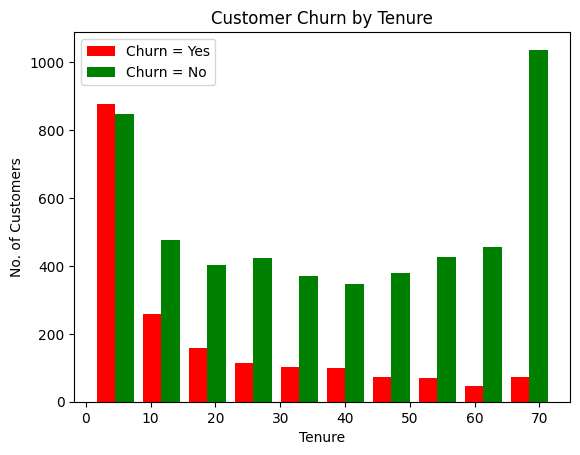

In [13]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure


plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red', 'green'], label = ['Churn = Yes', 'Churn = No'])
plt.xlabel('Tenure')
plt.ylabel('No. of Customers')
plt.title('Customer Churn by Tenure')
plt.legend()

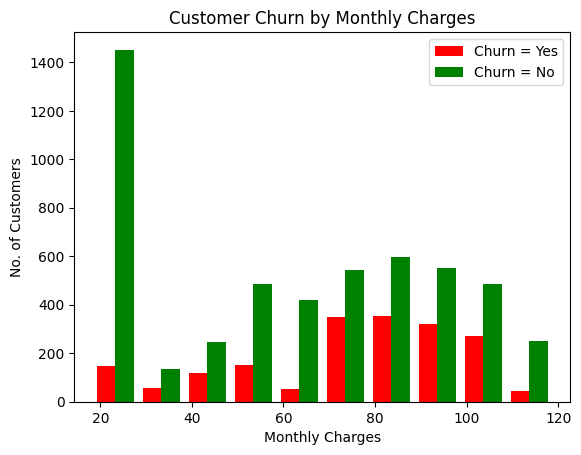

In [14]:
mcharges_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mcharges_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges


plt.hist([mcharges_churn_yes, mcharges_churn_no], color = ['red', 'green'], label = ['Churn = Yes', 'Churn = No'])
plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers')
plt.title('Customer Churn by Monthly Charges')
plt.legend()



Many of the columns are yes, no etc. Let's print unique values in object columns to see data values


In [8]:
def print_unique_col_values(df):
    for column in df:
            if df[column].dtype == 'object':
                print(f'{column} : {df[column].unique()}')

In [9]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Replace No like values with No

In [10]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17500\494651664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17500\494651664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace = True)


In [11]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Convert Yes or No with 1 or 0

In [12]:
yes_or_no = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_or_no:
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17500\63857779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)


In [20]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [19]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [13]:
df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace = True)
df1['gender'].unique()

C:\Users\HP\AppData\Local\Temp\ipykernel_17500\4098343554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace = True)


array([1, 0], dtype=int64)

In [14]:
#df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod']).astype(int)
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'], dtype = 'uint8')
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,0,1,0,1,0,0,0,0,0,1


In [25]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [26]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,0,1,0,1,0,0,0,0,0,1


In [15]:
X = df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [28]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [29]:
import imblearn

In [30]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X_ros, y_ros= ros.fit_resample(X,y)

In [31]:
y_ros.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [32]:
y_ros.shape

(10326,)

In [33]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
df2[cols_to_scale] = ss.fit_transform(df2[cols_to_scale])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, stratify = y_ros, random_state = 1000)

In [35]:
mdl = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(15, activation = 'relu'),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'relu'),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [36]:
mdl.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
mdl.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100


775/775 [==============================] - 3s 2ms/step - loss: 1.8882 - accuracy: 0.6157
Epoch 2/100
775/775 [==============================] - 2s 2ms/step - loss: 1.4964 - accuracy: 0.6763
Epoch 3/100
775/775 [==============================] - 2s 2ms/step - loss: 1.6624 - accuracy: 0.6839
Epoch 4/100
775/775 [==============================] - 1s 2ms/step - loss: 1.1133 - accuracy: 0.7024
Epoch 5/100
775/775 [==============================] - 2s 2ms/step - loss: 1.4632 - accuracy: 0.6960
Epoch 6/100
775/775 [==============================] - 1s 2ms/step - loss: 1.0672 - accuracy: 0.7045
Epoch 7/100
775/775 [==============================] - 2s 2ms/step - loss: 0.9766 - accuracy: 0.7067
Epoch 8/100
775/775 [==============================] - 1s 2ms/step - loss: 0.9024 - accuracy: 0.7157
Epoch 9/100
775/775 [==============================] - 1s 2ms/step - loss: 0.9059 - accuracy: 0.7109
Epoch 10/100
775/775 [==============================] - 1s 2ms/step - loss: 0.7096 - accu

In [38]:
mdl.evaluate(X_test, y_test)

81/81 [==============================] - 1s 2ms/step - loss: 0.4778 - accuracy: 0.7723


[0.4778013229370117, 0.7722695469856262]

In [39]:
yp = mdl.predict(X_test)


y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)



81/81 [==============================] - 0s 1ms/step


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1291
           1       0.77      0.77      0.77      1291

    accuracy                           0.77      2582
   macro avg       0.77      0.77      0.77      2582
weighted avg       0.77      0.77      0.77      2582



In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1001  290]
 [ 298  993]]


In [24]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [19]:


from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)





In [44]:
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [45]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1000, stratify=y_sm)



In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1000, stratify=y_sm)

# Further split training data for validation (optional)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1000, stratify=y_train)


In [134]:
mdl = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = 'sigmoid')
])

mdl.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

mdl.fit(X_train, y_train, epochs = 50, batch_size = 8)

Epoch 1/50
775/775 [==============================] - 5s 3ms/step - loss: 21.9683 - accuracy: 0.5359
Epoch 2/50
775/775 [==============================] - 2s 3ms/step - loss: 2.0072 - accuracy: 0.5569
Epoch 3/50
775/775 [==============================] - 2s 2ms/step - loss: 1.0907 - accuracy: 0.5755
Epoch 4/50
775/775 [==============================] - 2s 2ms/step - loss: 0.8764 - accuracy: 0.5858
Epoch 5/50
775/775 [==============================] - 2s 3ms/step - loss: 0.7493 - accuracy: 0.5932
Epoch 6/50
775/775 [==============================] - 2s 3ms/step - loss: 0.7212 - accuracy: 0.6023
Epoch 7/50
775/775 [==============================] - 2s 3ms/step - loss: 0.6943 - accuracy: 0.6068
Epoch 8/50
775/775 [==============================] - 2s 3ms/step - loss: 0.6638 - accuracy: 0.6195
Epoch 9/50
775/775 [==============================] - 3s 3ms/step - loss: 0.6565 - accuracy: 0.6260
Epoch 10/50
775/775 [==============================] - 2s 3ms/step - loss: 0.6464 - accuracy: 0.638

In [135]:
mdl.evaluate(X_test, y_test)

65/65 [==============================] - 0s 3ms/step - loss: 0.5035 - accuracy: 0.7638


[0.5034542083740234, 0.7637947797775269]

In [136]:
mdl.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 20)                540       
                                                                 
 dropout_14 (Dropout)        (None, 20)                0         
                                                                 
 dense_24 (Dense)            (None, 15)                315       
                                                                 
 dropout_15 (Dropout)        (None, 15)                0         
                                                                 
 dense_25 (Dense)            (None, 10)                160       
                                                                 
 dropout_16 (Dropout)        (None, 10)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                

In [137]:
yp = mdl.predict(X_test)


y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)



65/65 [==============================] - 0s 1ms/step


In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73      1033
           1       0.71      0.88      0.79      1033

    accuracy                           0.76      2066
   macro avg       0.78      0.76      0.76      2066
weighted avg       0.78      0.76      0.76      2066

[[669 364]
 [124 909]]


In [70]:
import keras
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    
    # Tune the number of layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=4, step=1)

    # Tune the number of units for each layer
    for i in range(num_layers):
        units = hp.Choice(f'units_layer_{i}', [32, 64, 128, 256])
        model.add(keras.layers.Dense(units=units, activation='relu'))
        
        # Tune dropout rates for each layer
        dropout_rate = hp.Float(f'dropout_rate_layer_{i}', min_value=0.1, max_value=0.5, step=0.2)
        model.add(keras.layers.Dropout(rate=dropout_rate))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate and optimizer choice
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    optimizer = 'adam'

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Define the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=50)

# Start the search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Get the best model
best_model = tuner.get_best_models()[0]


Trial 50 Complete [00h 00m 31s]
val_accuracy: 0.8251816034317017

Best val_accuracy So Far: 0.832929790019989
Total elapsed time: 00h 47m 02s


In [71]:
# best_model.summary()
best_model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8248


[0.3834799528121948, 0.8247821927070618]

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
y_pred = best_model.predict(X_test)

65/65 [==============================] - 0s 1ms/step


In [74]:
y_pred[:5]

array([[0.9209429 ],
       [0.9736505 ],
       [0.6918455 ],
       [0.307338  ],
       [0.01872886]], dtype=float32)

In [75]:
y_pred_binary = (y_pred > 0.5).astype("int32")

In [76]:
y_pred_binary[:5]

array([[1],
       [1],
       [1],
       [0],
       [0]])

In [77]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1033
           1       0.80      0.87      0.83      1033

    accuracy                           0.82      2066
   macro avg       0.83      0.82      0.82      2066
weighted avg       0.83      0.82      0.82      2066



In [78]:
print(confusion_matrix(y_test, y_pred_binary))

[[803 230]
 [132 901]]


In [95]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6912      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 7169 (28.00 KB)
Trainable params: 7169 (28.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
best_hyperparameters = tuner.get_best_hyperparameters()[0]  # Get the best hyperparameters
best_hyperparameters.values  # Print the hyperparameters

{'num_layers': 1,
 'units_layer_0': 256,
 'dropout_rate_layer_0': 0.1,
 'learning_rate': 0.001,
 'units_layer_1': 256,
 'dropout_rate_layer_1': 0.1,
 'units_layer_2': 64,
 'dropout_rate_layer_2': 0.1,
 'units_layer_3': 64,
 'dropout_rate_layer_3': 0.1}

In [21]:
mdl1 = keras.Sequential([
    keras.layers.Dense(256, input_shape = (26,), activation = 'relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(1, activation = 'sigmoid')
])
from keras.optimizers import Adam

# Define your desired learning rate
learning_rate = 0.001  # Example learning rate, you can change it as needed

# Create an instance of the Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile your model with the customized optimizer
mdl1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# mdl.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

mdl1.fit(X_train, y_train, epochs = 50)

Epoch 1/50


194/194 [==============================] - 1s 2ms/step - loss: 15.2646 - accuracy: 0.6144
Epoch 2/50
194/194 [==============================] - 0s 2ms/step - loss: 10.2272 - accuracy: 0.6529
Epoch 3/50
194/194 [==============================] - 0s 2ms/step - loss: 6.9722 - accuracy: 0.6927
Epoch 4/50
194/194 [==============================] - 0s 2ms/step - loss: 4.3566 - accuracy: 0.7112
Epoch 5/50
194/194 [==============================] - 0s 3ms/step - loss: 3.2183 - accuracy: 0.7140
Epoch 6/50
194/194 [==============================] - 0s 3ms/step - loss: 2.1816 - accuracy: 0.7288
Epoch 7/50
194/194 [==============================] - 0s 2ms/step - loss: 1.2396 - accuracy: 0.7482
Epoch 8/50
194/194 [==============================] - 0s 2ms/step - loss: 0.8952 - accuracy: 0.7514
Epoch 9/50
194/194 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.7619
Epoch 10/50
194/194 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.

In [24]:
mdl1.evaluate(X_test, y_test)

65/65 [==============================] - 1s 2ms/step - loss: 0.3754 - accuracy: 0.8335


[0.37543970346450806, 0.8334946632385254]

In [25]:
mdl1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               6912      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 7169 (28.00 KB)
Trainable params: 7169 (28.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
y_p1 = mdl1.predict(X_test)
y_p1_binary = (y_p1 > 0.5).astype("int32")

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_p1_binary))

65/65 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1033
           1       0.80      0.89      0.84      1033

    accuracy                           0.83      2066
   macro avg       0.84      0.83      0.83      2066
weighted avg       0.84      0.83      0.83      2066



In [26]:
mdl1.save('churn.h5')

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
